In [1]:
import pandas as pd
import numpy as np

from lib.utils import get_oxford_dfs

In [2]:
results = pd.read_csv('/Users/beneverman/Documents/Coding/QuantHive/IDVF-Oxford-v1/outputs/dnn-replication-v1/2023-10-21_11-04-34/result.csv', index_col=0)

In [3]:
results

,TMOout,ABTout,HDout,MCDout,PGout,CATout,DISout,CCIout,JNJout,KOout,...,COSTreal,IBMreal,ADPreal,AVGOreal,WMTreal,AMGNreal,INTUreal,AXPreal,MMCreal,CBreal
datetime,,,,,,,,,,,,,,,,,,,,,
2020-06-30 11:40:00-04:00,-10.766104,-10.637773,-10.717343,-10.374678,-10.745627,-10.090323,-9.960076,-10.366513,-11.090115,-10.693134,...,-11.253455,-10.649981,-10.598242,-10.344258,-11.147863,-10.378950,-10.929075,-9.979297,-10.721108,-10.092997
2020-06-30 12:45:00-04:00,-10.986913,-11.060369,-11.245936,-11.081890,-11.282684,-10.742038,-10.734292,-10.848134,-11.602418,-11.380569,...,-11.980269,-11.450229,-11.163184,-10.887134,-12.162775,-11.874297,-10.718272,-10.921361,-11.423973,-10.929131
2020-06-30 13:50:00-04:00,-11.089479,-11.300066,-11.473561,-11.388901,-11.704370,-10.944809,-10.969642,-11.155098,-11.972002,-11.618597,...,-12.398249,-11.250099,-11.206890,-11.086279,-12.356636,-11.066643,-10.540456,-11.244320,-11.620165,-10.765632
2020-06-30 14:55:00-04:00,-11.063336,-11.510293,-11.339195,-11.344222,-11.866726,-10.738791,-10.708914,-10.935207,-11.736834,-11.331300,...,-12.226889,-11.341149,-11.427974,-11.178608,-12.147603,-11.413447,-11.215041,-10.856284,-11.684907,-10.564307
2020-06-30 16:00:00-04:00,-10.937835,-10.994500,-10.711469,-10.764264,-10.943920,-10.726531,-10.617581,-10.538352,-10.879184,-11.204255,...,-10.540254,-10.290234,-9.728313,-10.068771,-11.197515,-9.388138,-9.749370,-10.108612,-10.488511,-10.253733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-09 10:35:00-04:00,-9.626545,-9.963071,-10.099224,-10.163681,-10.133100,-9.257902,-9.530034,-9.260057,-10.313614,-9.799196,...,-9.752587,-10.700455,-10.591162,-9.313613,-9.548909,-9.742343,-10.126467,-9.601089,-10.100538,-10.277643
2023-10-09 11:40:00-04:00,-11.023311,-11.244376,-11.076447,-11.041481,-11.234173,-10.291932,-10.480277,-10.282364,-11.313402,-10.739516,...,-10.752899,-11.384324,-11.297519,-10.206596,-11.178907,-10.680779,-10.645832,-10.627294,-11.829896,-11.312079
2023-10-09 12:45:00-04:00,-11.173374,-11.838224,-11.749204,-11.925183,-11.899056,-10.828366,-10.928195,-11.161988,-12.138461,-11.144690,...,-10.925418,-12.035542,-12.237446,-11.091774,-11.439434,-11.202431,-11.457626,-11.228341,-11.642755,-11.378411


In [31]:
def exp(rv: float) -> float:
    """
    Convert realized volatility to historical volatility.
    
    :param rv: Realized volatility (log-transformed)
    :return: Historical volatility
    """
    return np.exp(rv)

def annualize_volatility(x: pd.Series) -> pd.Series:
    """
    Annualize a volatility figure given for a 65-minute window.
    
    :param hv_65min: Historical volatility for a 65-minute window
    :return: Annualized volatility
    """
    # Number of 65-minute windows in a trading year
    windows_per_year = (390 * 252) / 65
    return x.apply(np.sqrt(windows_per_year))

In [48]:
def func(x: pd.Series):
    x = np.exp(x)
    x = np.sqrt((390 * 252) / 65) * x
    return x

def func2(x: pd.Series):
    x = x**2
    return np.sqrt(x.sum())

In [43]:
val1 = results['MSFTreal'].iloc[:6]

In [51]:
val1.apply(func)

datetime
2020-06-30 11:40:00-04:00    0.000930
2020-06-30 12:45:00-04:00    0.000511
2020-06-30 13:50:00-04:00    0.000667
2020-06-30 14:55:00-04:00    0.000442
2020-06-30 16:00:00-04:00    0.001312
2020-07-01 10:35:00-04:00    0.003153
Name: MSFTreal, dtype: float64

In [53]:
np.sqrt(val1.apply(func).apply(lambda x: x ** 2).sum())

0.0036645364672543658

In [56]:
func(results['MSFTreal'])

datetime
2020-06-30 11:40:00-04:00    0.000930
2020-06-30 12:45:00-04:00    0.000511
2020-06-30 13:50:00-04:00    0.000667
2020-06-30 14:55:00-04:00    0.000442
2020-06-30 16:00:00-04:00    0.001312
                               ...   
2023-10-09 10:35:00-04:00    0.003472
2023-10-09 11:40:00-04:00    0.000803
2023-10-09 12:45:00-04:00    0.000395
2023-10-09 13:50:00-04:00    0.000363
2023-10-09 14:55:00-04:00    0.000340
Name: MSFTreal, Length: 4938, dtype: float64

In [10]:
returns

NameError: name 'returns' is not defined

In [ ]:
results['MSFTreal']

datetime
2020-06-30 11:40:00-04:00   -10.641453
2020-06-30 12:45:00-04:00   -11.239194
2020-06-30 13:50:00-04:00   -10.972608
2020-06-30 14:55:00-04:00   -11.385024
2020-06-30 16:00:00-04:00   -10.296562
                               ...    
2023-10-09 10:35:00-04:00    -9.323506
2023-10-09 11:40:00-04:00   -10.788195
2023-10-09 12:45:00-04:00   -11.497487
2023-10-09 13:50:00-04:00   -11.582705
2023-10-09 14:55:00-04:00   -11.647723
Name: MSFTreal, Length: 4938, dtype: float64

<Axes: xlabel='datetime'>

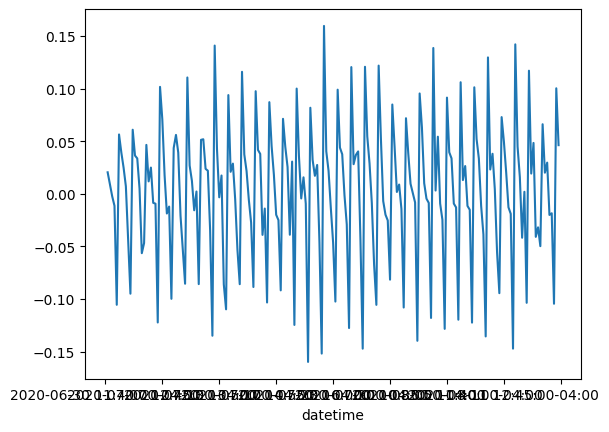

In [ ]:
(results['TMOout']).pct_change()[:200].plot()